<a href="https://colab.research.google.com/github/Manideepbokka/CapstoneMLProject/blob/main/CapStoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('superstore.csv', on_bad_lines='skip')



<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  2016-11-08  2016-11-11    Second Class   
1          2  CA-2016-152156  2016-11-08  2016-11-11    Second Class   
2          3  CA-2016-138688  2016-06-12  2016-06-16    Second Class   
3          4  US-2015-108966  2015-10-11  2015-10-18  Standard Class   
4          5  US-2015-108966  2015-10-11  2015-10-18  Standard Class   
...      ...             ...         ...         ...             ...   
9689    9990  CA-2014-110422  2014-01-21  2014-01-23    Second Class   
9690    9991  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9691    9992  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9692    9993  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9693    9994  CA-2017-119914  2017-05-04  2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

To load data from Google Drive, you first need to mount your Drive. The following cell will prompt you to authenticate and grant Google Colab access to your Drive files.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9694 entries, 0 to 9693
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9694 non-null   int64  
 1   Order ID       9694 non-null   object 
 2   Order Date     9694 non-null   object 
 3   Ship Date      9694 non-null   object 
 4   Ship Mode      9694 non-null   object 
 5   Customer ID    9694 non-null   object 
 6   Customer Name  9694 non-null   object 
 7   Segment        9694 non-null   object 
 8   Country        9694 non-null   object 
 9   City           9694 non-null   object 
 10  State          9694 non-null   object 
 11  Postal Code    9694 non-null   int64  
 12  Region         9694 non-null   object 
 13  Product ID     9694 non-null   object 
 14  Category       9694 non-null   object 
 15  Sub-Category   9694 non-null   object 
 16  Product Name   9694 non-null   object 
 17  Sales          9694 non-null   float64
 18  Quantity

In [17]:
df.head()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9630 entries, 0 to 9693
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9630 non-null   int64  
 1   Order ID       9630 non-null   object 
 2   Order Date     9630 non-null   object 
 3   Ship Date      9630 non-null   object 
 4   Ship Mode      9630 non-null   object 
 5   Customer ID    9630 non-null   object 
 6   Customer Name  9630 non-null   object 
 7   Segment        9630 non-null   object 
 8   Country        9630 non-null   object 
 9   City           9630 non-null   object 
 10  State          9630 non-null   object 
 11  Postal Code    9630 non-null   int64  
 12  Region         9630 non-null   object 
 13  Product ID     9630 non-null   object 
 14  Category       9630 non-null   object 
 15  Sub-Category   9630 non-null   object 
 16  Product Name   9630 non-null   object 
 17  Sales          9630 non-null   float64
 18  Quantity     

In [18]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [20]:
y = pd.to_numeric(df['Profit'])
x = numeric_df
print(x.shape, y.shape)

(9630, 6) (9630,)


In [22]:
df.describe()
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [23]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [24]:
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'Row ID': 9630 unique values
Column 'Order ID': 4915 unique values
Column 'Order Date': 1232 unique values
Column 'Ship Date': 1332 unique values
Column 'Ship Mode': 4 unique values
Column 'Customer ID': 793 unique values
Column 'Customer Name': 793 unique values
Column 'Segment': 3 unique values
Column 'Country': 1 unique values
Column 'City': 527 unique values
Column 'State': 49 unique values
Column 'Postal Code': 627 unique values
Column 'Region': 4 unique values
Column 'Product ID': 1803 unique values
Column 'Category': 3 unique values
Column 'Sub-Category': 17 unique values
Column 'Product Name': 1789 unique values
Column 'Sales': 5670 unique values
Column 'Quantity': 14 unique values
Column 'Discount': 12 unique values
Column 'Profit': 7053 unique values


In [47]:
#Ship Mode, Category, Region, Segment
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [48]:
df['Ship Mode'] = encoder.fit_transform(df['Ship Mode'])

df['Category'] = encoder.fit_transform(df['Category'])

df['Region'] = encoder.fit_transform(df['Region'])

df['Segment'] = encoder.fit_transform(df['Segment'])

df.head()

/tmp/ipython-input-2308228781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ship Mode'] = encoder.fit_transform(df['Ship Mode'])
/tmp/ipython-input-2308228781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = encoder.fit_transform(df['Category'])
/tmp/ipython-input-2308228781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,42420,2,FUR-BO-10001798,0,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,42420,2,FUR-CH-10000454,0,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,2,DV-13045,Darrin Van Huff,1,United States,Los Angeles,...,90036,3,OFF-LA-10000240,1,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311,2,FUR-TA-10000577,0,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311,2,OFF-ST-10000760,1,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [69]:
columns_to_exclude = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Product ID', 'Product Name', 'Profit']
X = df.drop(columns=columns_to_exclude)
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (7704, 9)
Shape of X_test: (1926, 9)
Shape of y_train: (7704,)
Shape of y_test: (1926,)


In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [71]:
model.fit(X_train, y_train)

LinearRegression()

In [72]:
print(model.coef_)

[-1.89735295e-01  3.92600451e+00  6.31142204e-05 -6.73645765e+00
  1.84896736e+01 -4.16171328e+00  1.52748819e-01 -2.80602149e+00
 -2.79281492e+02]


In [73]:
print(model.intercept_)

63.360772936533806


In [75]:
predictions = model.predict(X_test)

In [76]:
print(y_test[:10])
print(predictions[:10])

120      19.7316
4452      4.9728
972     762.1845
2108     -8.9970
7495     -2.5698
3615    107.4785
669       6.8714
1796      9.7328
2321      3.1104
4108      7.0227
Name: Profit, dtype: float64
[ 31.50224617   5.35348133 427.20074448  42.73625112  -8.23416054
 112.46124432  25.85637798  28.65252373  23.4197247  -35.3750338 ]


In [78]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test, predictions)
print(mse)
linear_regression_r2 = r2_score(y_test, predictions)
print(linear_regression_r2)

56.38291500073204
0.5046275069694621


In [80]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state=42)

decision_tree_model.fit(X_train, y_train)

decision_tree_predictions = decision_tree_model.predict(X_test)

decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print(decision_tree_mae)
print(decision_tree_r2)

23.800052544132917
0.757757961477912


In [81]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)

random_forest_model.fit(X_train, y_train)

random_forest_predictions = random_forest_model.predict(X_test)

random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(random_forest_mae)
print(random_forest_r2)

18.761856757286253
0.848166674458616


In [82]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(xgb_mae)
print(xgb_r2)

20.99216849729512
0.7669608043247432


Model Performance Metrics:
                               MAE        R2
Model                                       
Linear Regression        56.382915  0.504628
Decision Tree Regressor  23.800053  0.757758
Random Forest Regressor  18.761857  0.848167
XGBoost Regressor        20.992168  0.766961


/tmp/ipython-input-856775802.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-856775802.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='R2', data=metrics_df, ax=axes[1], palette='magma')


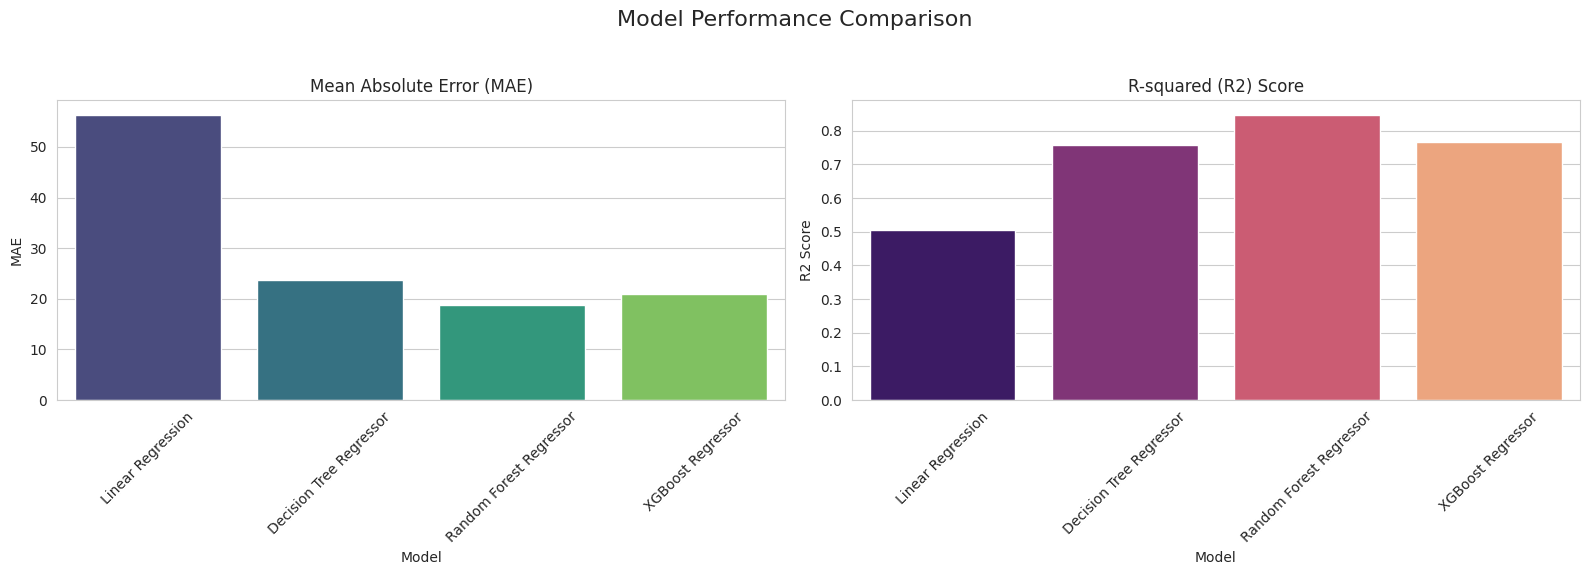

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
metrics_df.index.name = 'Model'

print("Model Performance Metrics:")
print(metrics_df)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=metrics_df.index, y='R2', data=metrics_df, ax=axes[1], palette='magma')
axes[1].set_title('R-squared (R2) Score')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [90]:
#Random Forest Regressor has given the best performance b/w all the models

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor - Hyperparameter Tuning
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

dt_grid_search = GridSearchCV(DecisionTreeRegressor(), dt_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

best_dt_model = dt_grid_search.best_estimator_
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")

dt_tuned_predictions = best_dt_model.predict(X_test)
dt_tuned_mae = mean_absolute_error(y_test, dt_tuned_predictions)
dt_tuned_r2 = r2_score(y_test, dt_tuned_predictions)

print(f"Tuned Decision Tree MAE: {dt_tuned_mae}")
print(f"Tuned Decision Tree R2: {dt_tuned_r2}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}
Tuned Decision Tree MAE: 24.33329532372002
Tuned Decision Tree R2: 0.7488022851904805


In [87]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor - Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 5],
    'random_state': [42]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

rf_tuned_predictions = best_rf_model.predict(X_test)
rf_tuned_mae = mean_absolute_error(y_test, rf_tuned_predictions)
rf_tuned_r2 = r2_score(y_test, rf_tuned_predictions)

print(f"Tuned Random Forest MAE: {rf_tuned_mae}")
print(f"Tuned Random Forest R2: {rf_tuned_r2}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300, 'random_state': 42}
Tuned Random Forest MAE: 19.006780692445897
Tuned Random Forest R2: 0.8346840786539153


In [89]:
from xgboost import XGBRegressor

# XGBoost Regressor - Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'random_state': [42]
}

xgb_grid_search = GridSearchCV(XGBRegressor(), xgb_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

best_xgb_model = xgb_grid_search.best_estimator_
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")

xgb_tuned_predictions = best_xgb_model.predict(X_test)
xgb_tuned_mae = mean_absolute_error(y_test, xgb_tuned_predictions)
xgb_tuned_r2 = r2_score(y_test, xgb_tuned_predictions)

print(f"Tuned XGBoost MAE: {xgb_tuned_mae}")
print(f"Tuned XGBoost R2: {xgb_tuned_r2}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'random_state': 42, 'subsample': 0.9}
Tuned XGBoost MAE: 20.94828632341698
Tuned XGBoost R2: 0.7773500339633125


# Task
Prepare the `X_train`, `X_test`, `y_train`, and `y_test` data for TensorFlow model training by converting them into NumPy arrays.

## Prepare Data for TensorFlow

### Subtask:
Convert the `X_train`, `X_test`, `y_train`, and `y_test` pandas DataFrames/Series into TensorFlow-compatible formats, such as NumPy arrays or TensorFlow Datasets. This ensures the data is ready for neural network processing.


**Reasoning**:
To prepare the data for TensorFlow processing, I need to convert the pandas DataFrames and Series into NumPy arrays as specified in the instructions.



In [91]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

print(f"X_train_np shape: {X_train_np.shape}")
print(f"X_test_np shape: {X_test_np.shape}")
print(f"y_train_np shape: {y_train_np.shape}")
print(f"y_test_np shape: {y_test_np.shape}")

X_train_np shape: (7704, 9)
X_test_np shape: (1926, 9)
y_train_np shape: (7704,)
y_test_np shape: (1926,)


## Define and Compile TensorFlow Model

### Subtask:
Build a neural network architecture using TensorFlow's Keras API. This will involve defining layers (e.g., Dense), activation functions (e.g., ReLU), and an output layer suitable for regression. Compile the model by specifying an optimizer (e.g., Adam), a loss function (e.g., Mean Squared Error), and evaluation metrics (e.g., MAE).


**Reasoning**:
I need to build a neural network using TensorFlow's Keras API, including defining layers, activation functions, and compiling the model with an optimizer, loss function, and metrics as per the instructions.



In [92]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

# Define the sequential model
model = keras.Sequential()

# Add the input layer and a hidden Dense layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train_np.shape[1],)))

# Add another hidden Dense layer
model.add(Dense(units=64, activation='relu'))

# Add the output layer for regression (1 unit, linear activation)
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
history = model.fit(X_train_np, y_train_np, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
print("Model training complete.")

Model training complete.


In [95]:
loss, mae = model.evaluate(X_test_np, y_test_np, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test Loss: 29293.2715
Test MAE: 48.6615


In [96]:
from sklearn.metrics import r2_score

tf_predictions = model.predict(X_test_np)

tf_r2 = r2_score(y_test_np, tf_predictions)

performance_metrics['TensorFlow Model'] = {'MAE': mae, 'R2': tf_r2}

print("Updated performance_metrics:")
print(performance_metrics)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Updated performance_metrics:
{'Linear Regression': {'MAE': 56.38291500073204, 'R2': 0.5046275069694621}, 'Decision Tree Regressor': {'MAE': 23.800052544132917, 'R2': 0.757757961477912}, 'Random Forest Regressor': {'MAE': 18.761856757286253, 'R2': 0.848166674458616}, 'XGBoost Regressor': {'MAE': 20.99216849729512, 'R2': 0.7669608043247432}, 'TensorFlow Model': {'MAE': 48.661460876464844, 'R2': 0.48812018156632075}}


In [97]:
model.save('tensorflow_model.h5')
print("TensorFlow model saved to 'tensorflow_model.h5'")

TensorFlow model saved to 'tensorflow_model.h5'


In [98]:
model.save('tensorflow_model.keras')
print("TensorFlow model saved to 'tensorflow_model.keras' in native Keras format")

TensorFlow model saved to 'tensorflow_model.keras' in native Keras format


In [99]:
import tensorflow as tf

# Load the previously saved model
loaded_model = tf.keras.models.load_model('tensorflow_model.keras')

# Make predictions using the loaded model
loaded_model_predictions = loaded_model.predict(X_test_np)

# Print the first few predictions
print("First 10 predictions from loaded model:")
print(loaded_model_predictions[:10])

49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
First 10 predictions from loaded model:
[[  2.6012504]
 [  1.392872 ]
 [328.76532  ]
 [  1.1813407]
 [  1.1813407]
 [  1.1813407]
 [  2.217197 ]
 [  2.7286673]
 [  3.4951026]
 [  3.1287925]]


Model Performance Metrics:
                               MAE        R2
Model                                       
Linear Regression        56.382915  0.504628
Decision Tree Regressor  23.800053  0.757758
Random Forest Regressor  18.761857  0.848167
XGBoost Regressor        20.992168  0.766961
TensorFlow Model         48.661461  0.488120


/tmp/ipython-input-856775802.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-856775802.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='R2', data=metrics_df, ax=axes[1], palette='magma')


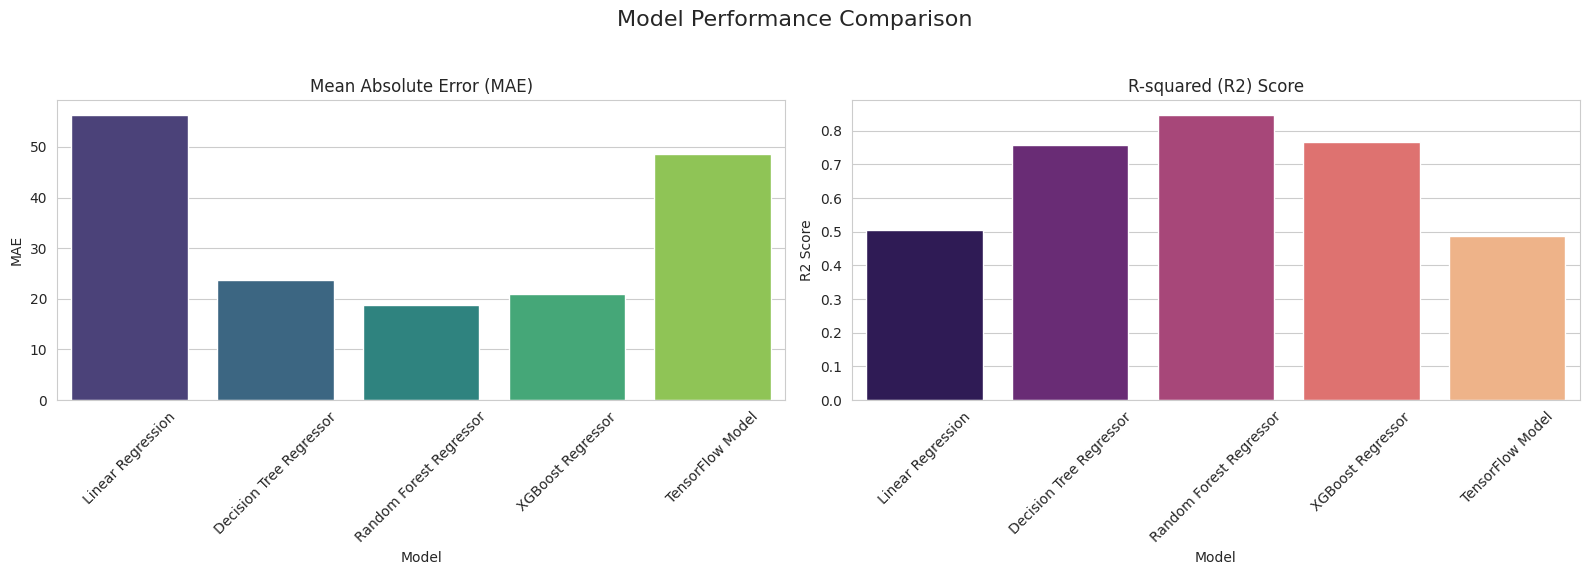

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
metrics_df.index.name = 'Model'

print("Model Performance Metrics:")
print(metrics_df)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=metrics_df.index, y='R2', data=metrics_df, ax=axes[1], palette='magma')
axes[1].set_title('R-squared (R2) Score')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Model Performance Metrics:
                               MAE        R2
Model                                       
Linear Regression        56.382915  0.504628
Decision Tree Regressor  23.800053  0.757758
Random Forest Regressor  18.761857  0.848167
XGBoost Regressor        20.992168  0.766961
TensorFlow Model         48.661461  0.488120


/tmp/ipython-input-2670508959.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, ax=axes[0], palette='viridis', legend=False)
/tmp/ipython-input-2670508959.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='R2', data=metrics_df, ax=axes[1], palette='magma', legend=False)


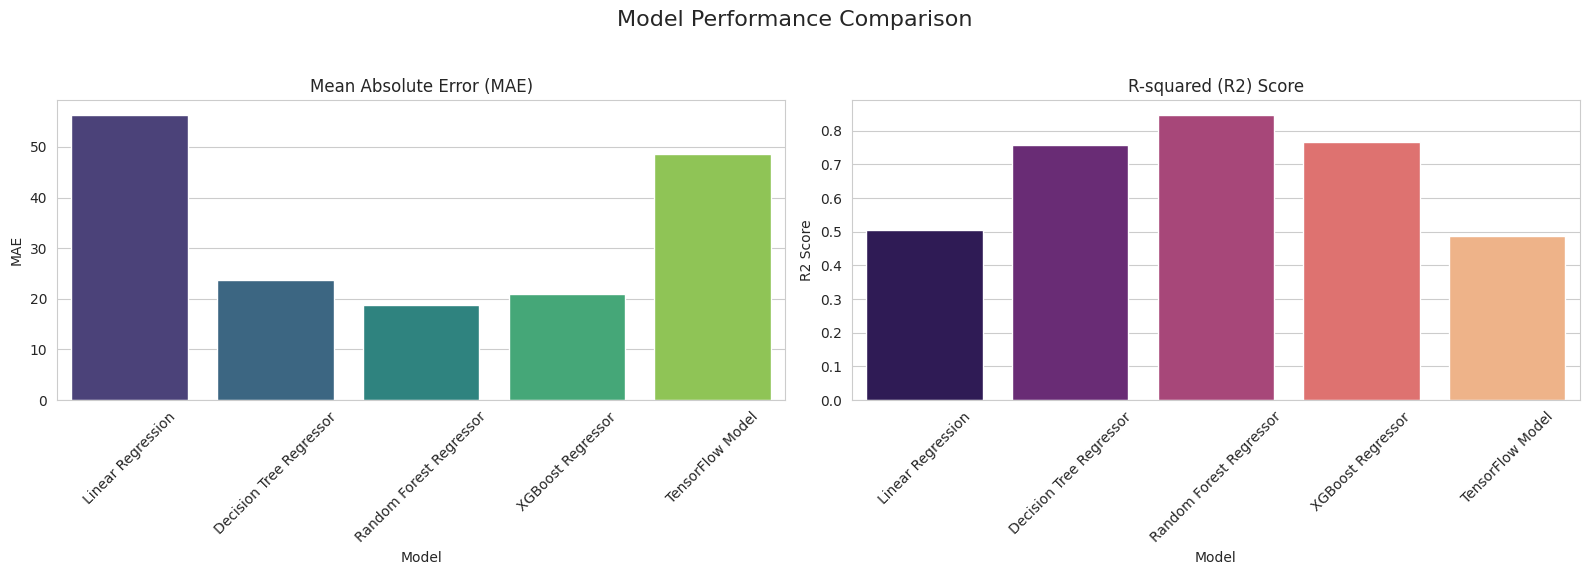

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
metrics_df.index.name = 'Model'

print("Model Performance Metrics:")
print(metrics_df)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=metrics_df.index, y='R2', data=metrics_df, ax=axes[1], palette='magma', legend=False)
axes[1].set_title('R-squared (R2) Score')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Model Performance Metrics:
                               MAE        R2
Model                                       
Linear Regression        56.382915  0.504628
Decision Tree Regressor  23.800053  0.757758
Random Forest Regressor  18.761857  0.848167
XGBoost Regressor        20.992168  0.766961
TensorFlow Model         48.661461  0.488120


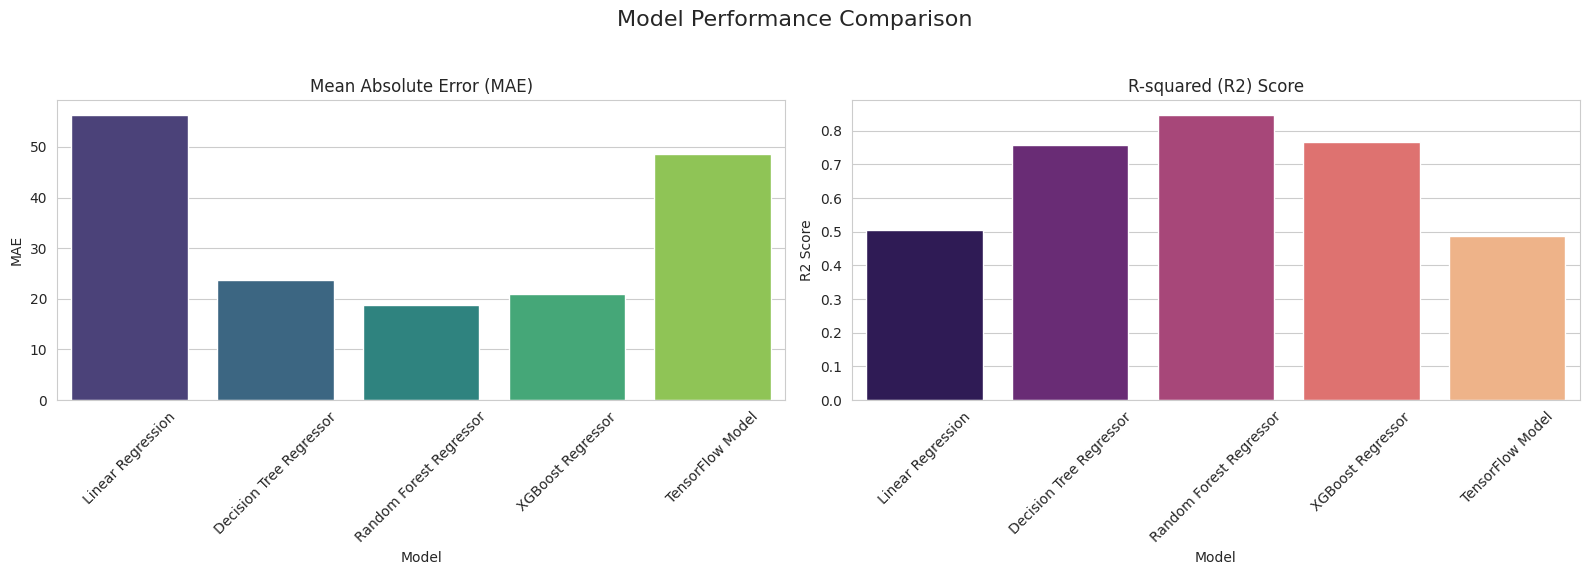

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
metrics_df.index.name = 'Model'

print("Model Performance Metrics:")
print(metrics_df)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, ax=axes[0], palette='viridis', hue=metrics_df.index, legend=False)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=metrics_df.index, y='R2', data=metrics_df, ax=axes[1], palette='magma', hue=metrics_df.index, legend=False)
axes[1].set_title('R-squared (R2) Score')
axes[1].set_ylabel('R2 Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()